# 1.0. Pandas - Первое знакомство

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np

http://pandas.pydata.org/

Pandas - open-source  проект, предоставляющий средства для работы с данными в Питоне с использованием абстракций более высокого уровня, чем numpy.

В основе своей pandas полагается на структуры данных numpy, но вместе с тем предоставляет:

* различные типы данных в рамках одной структуры pandas.DataFrame;
* работу с пропущенными значениями;
* удобную работу с типом DateTime;
* набор методов для совместного использования нескольких массивов данных.

** Series **

Series - это массив размерности один, который может содержать данные различного типа, и 1:1 соответствие между данными и некоторой меткой, присвоенной каждому элементу.

In [2]:
series = pd.Series([-12, 'Nan', 1])

In [3]:
series.values

array([-12, 'Nan', 1], dtype=object)

In [4]:
series.index

Int64Index([0, 1, 2], dtype='int64')

In [5]:
series

0    -12
1    Nan
2      1
dtype: object

Мы можем создавать объекты, самостоятельно задавая индекс:

In [6]:
series2 = pd.Series([0,1,2], index=['a', 'b', 'c'])

Преимущества индексирования понятны - мы имеем быстрый доступ к элементам массива, при этом можем пользоваться всеми (практически) свойствами массивов numpy.

In [7]:
series[0]

-12

In [8]:
series[0:2]

0    -12
1    Nan
dtype: object

Обратите внимание:

In [9]:
series[range(2,4)]

2      1
3    NaN
dtype: object

In [10]:
series[range(2,5)]

2      1
3    NaN
4    NaN
dtype: object

но:

In [11]:
series[4]

KeyError: 4

Ну что поделать, open-software стак и не должен быть идеальным!

**Булево индексирование:**

In [12]:
series > 0

0    False
1     True
2     True
dtype: bool

In [13]:
series[series > 0]

1    Nan
2      1
dtype: object

In [14]:
2 in series

True

Конструктор принимет массив ранга один либо словарь. Ключи словаря используются как индекс (в отсортированном порядке):

In [15]:
pd.Series({'a':1, 'c':2, 'b':3})

a    1
b    3
c    2
dtype: int64

In [16]:
index = ['a_letter', 'b_letter', 'c_letter']

Если вызывается конструктор со словарем и парметром index = , то отсутствующие в словаре ключи получат NaN.

In [17]:
pd.Series({'a_letter':1, 'b_letter':2, 'c':3}, index=index)

a_letter     1
b_letter     2
c_letter   NaN
dtype: float64

In [18]:
pd.Series([1, 2, 3], index=index)

a_letter    1
b_letter    2
c_letter    3
dtype: int64

Операции с Series напоминают операции с ndarray:

In [19]:
series

0    -12
1    Nan
2      1
dtype: object

In [20]:
series[1] = 100

In [21]:
series + series

0    -24
1    200
2      2
dtype: object

In [22]:
series * series

0      144
1    10000
2        1
dtype: object

In [23]:
np.exp(series.astype(int))

0    6.144212e-06
1    2.688117e+43
2    2.718282e+00
dtype: float64

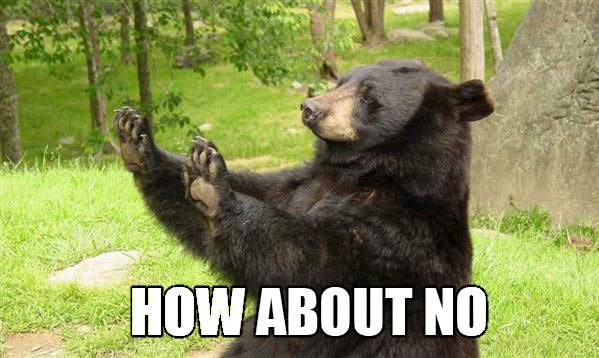

In [24]:
from IPython.display import Image

Image('no.jpg')

In [25]:
np.exp(series)

AttributeError: 'int' object has no attribute 'exp'

Самому Series и индексу можно присовить атрибут имя:

In [26]:
series.name = 'some_test_series'

In [27]:
series

0    -12
1    100
2      1
Name: some_test_series, dtype: object

In [28]:
series.index.name = 'some_test_index'

In [29]:
series

some_test_index
0    -12
1    100
2      1
Name: some_test_series, dtype: object

In [30]:
series.index

Int64Index([0, 1, 2], dtype='int64', name=u'some_test_index')

Важно помнить, как pandas обращается с несовпадающими индексами:

In [31]:
first_series = pd.Series({'a':1, 'b':2, 'c':2})
second_series = pd.Series({'a':1, 'b':2, 'd':-1})

In [32]:
first_series + second_series

a     2
b     4
c   NaN
d   NaN
dtype: float64

Индекс всегда можно поменять:

In [33]:
series

some_test_index
0    -12
1    100
2      1
Name: some_test_series, dtype: object

In [34]:
series.index = ['a_letter', 'b_letter', 'c_letter']

In [36]:
series

a_letter    -12
b_letter    100
c_letter      1
Name: some_test_series, dtype: object

In [49]:
series.loc['a_letter']

-12

In [50]:
series.a_letter

-12

In [51]:
series.iloc[0:2]

a_letter    -12
b_letter    100
Name: some_test_series, dtype: object

# 1.1. Pandas DataFrame

Представим себе структуру, которая могла бы содержать несколько объекто типа Series, объединенных общим индексом. Тогда бы такая структура являлась pandas.DataFrame - табличным форматом данных, снабженным 2 типами индексов - строчным и колоночным.

In [37]:
df = pd.DataFrame({'A': [20, 10, 30], 'B': np.random.randn(3),
                   'C': ['A', 'B', 'C']}, index=['a', 'b', 'c'])

In [38]:
df

,A,B,C
a,20,-0.723270,A
b,10,0.148666,B
c,30,0.950108,C


Выбор столбца ниче не отличается от стандартного \_\_getitem\_\_ синтаксиса:

In [39]:
df['A']

a    20
b    10
c    30
Name: A, dtype: int64

In [56]:
df[['A', 'C']]

,A,C
a,20,A
b,10,B
c,30,C


In [41]:
df.A

a    20
b    10
c    30
Name: A, dtype: int64

Возможные аргументы для конструктора:

* массив ранга 2 (индексы для столбцов и строк передаются отдельным аргументом либо будет использован xrange);
* словарь массивов ранга 1 (ключ - имя стобца, данные - элементы последовательности);
* словарь объектов pd.Series;
* словарь словарей (ключи внутреннего словаря - имена столбцов), ключи внешнего словаря - индекс обеъкта;
* список словарей - имена столбцов - объединения ключей в словарях.

Выбор строки:

In [42]:
df.loc[['a', 'b']]

,A,B,C
a,20,-0.723270,A
b,10,0.148666,B


In [44]:
df.loc['a':'с']

,A,B,C
a,20,-0.723270,A
b,10,0.148666,B
c,30,0.950108,C


--  N: Обратите внимание - slice подобного типа включает в себя крайний объект "справа".

In [45]:
df.iloc[0:2]

,A,B,C
a,20,-0.723270,A
b,10,0.148666,B


--  N: А такой - не включает.

In [46]:
df.loc['a', 'B']

-0.72327029774772156

In [47]:
df.loc['a':'b', ['A', 'C']]

,A,C
a,20,A
b,10,B


** Операции с dataframe **

In [52]:
df

,A,B,C
a,20,-0.723270,A
b,10,0.148666,B
c,30,0.950108,C


In [58]:
df[['A', 'B']] + 5

,A,B
a,25,4.276730
b,15,5.148666
c,35,5.950108


In [59]:
df[['A', 'C']] + df[['A', 'C']]

,A,C
a,40,AA
b,20,BB
c,60,CC


Теперь внимание:

In [62]:
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [6, 2, 4], 'B': [9, 1, 4]}, index=[2, 0, 1])

In [63]:
df1

,A,B
0,1,4
1,2,5
2,3,6


In [64]:
df2

,A,B
2,6,9
0,2,1
1,4,4


In [65]:
df1 + df2

,A,B
0,3,5
1,6,9
2,9,15


Очень хорошо!

In [66]:
df3 = pd.DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])
df3

,A,B,C
0,-2.843735,-0.755111,0.554822
1,1.539806,0.135851,-1.726427
2,1.458136,0.418021,1.162106
3,-0.176647,0.463890,1.388556
4,2.791259,-1.447409,1.293927


In [67]:
df1 + df3

,A,B,C
0,-1.843735,3.244889,NaN
1,3.539806,5.135851,NaN
2,4.458136,6.418021,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


После примера с Series - такое поведение как раз и ожидалось.

Тем не менее, бывают случаи, когда нам требуется чем - либо заполнить места, в которых индекс не пересекается. В таких случаях удобно использовать параметр fill_value.

In [118]:
df1.add(df3, fill_value=0)

,A,B,C
0,-1.843735,3.244889,0.554822
1,3.539806,5.135851,-1.726427
2,4.458136,6.418021,1.162106
3,-0.176647,0.463890,1.388556
4,2.791259,-1.447409,1.293927


Таких "гибких" арифметических операций 4:

* df.add;
* df.sub;
* df.div;
* df.mul.

Как наследие массива из numpy, мы можем использовать broadcasting:

In [119]:
df = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['U', 'O', 'T', 'Z'])

In [120]:
df

,b,d,e
U,0,1,2
O,3,4,5
T,6,7,8
Z,9,10,11


In [123]:
series = df.ix[0]

In [124]:
series

b    0
d    1
e    2
Name: U, dtype: float64

In [125]:
df - series

,b,d,e
U,0,0,0
O,3,3,3
T,6,6,6
Z,9,9,9


Совпадение считается по индексу. Если индексы не совпадают, то операция будет использовать объединения индексов:

In [126]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [128]:
df + series2

,b,d,e,f
U,0,NaN,3,NaN
O,3,NaN,6,NaN
T,6,NaN,9,NaN
Z,9,NaN,12,NaN


Если хочется broadcast по столбцам, то нужно использовать один из 4 методов, которые мы поисали ранее:

In [129]:
series3 = df['d']

In [130]:
df

,b,d,e
U,0,1,2
O,3,4,5
T,6,7,8
Z,9,10,11


In [131]:
series3

U     1
O     4
T     7
Z    10
Name: d, dtype: float64

In [133]:
df.sub(series3, axis=0)

,b,d,e
U,-1,0,1
O,-1,0,1
T,-1,0,1
Z,-1,0,1


# 1.2. Индексирование.

Для индекса pandas имеет отдельный тип объекта - index object. Это immutable тип данных.

In [68]:
s1 = pd.Series(xrange(3), index=['a', 'b', 'c'])

In [69]:
s1

a    0
b    1
c    2
dtype: int64

In [70]:
index = s1.index

In [71]:
index

Index([u'a', u'b', u'c'], dtype='object')

In [72]:
index[0]

'a'

In [74]:
index[0] = u'd'

TypeError: Index does not support mutable operations

 Immutable тип позволяет различным структарам иметь общий индекс.

In [75]:
s2 = pd.Series([1.5, -2.5, 0], index=index)

In [76]:
s2.index is s1.index

True

In [77]:
index

Index([u'a', u'b', u'c'], dtype='object')

** Типы индексов **:

* Index, индекс общего назначения, когда индексируется dtype = np.object;
* Int64Index - целочисленный индекс;
* MultiIndex - вложенный иерархический индекс;
* DatetimeIndex - np.datetime64;
* PeriodIndex - индекс для временных периодов.

Для индекса доступны следующие методы:

In [81]:
index.unique()

array(['a', 'b', 'c'], dtype=object)

In [83]:
index.is_unique

True

In [84]:
index.is_monotonic

True

In [93]:
index.insert(5, u'd')

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [94]:
index

Index([u'a', u'b', u'c'], dtype='object')

In [95]:
index.drop(u'c')

Index([u'a', u'b'], dtype='object')

In [96]:
index

Index([u'a', u'b', u'c'], dtype='object')

In [98]:
index.append(index)

Index([u'a', u'b', u'c', u'a', u'b', u'c'], dtype='object')

In [99]:
index

Index([u'a', u'b', u'c'], dtype='object')

** Реиндексирование **

In [101]:
ser3 = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [102]:
ser4 = ser3.reindex(['a', 'b', 'c', 'd', 'e'])

In [103]:
ser4

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [104]:
ser3.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

Иногда (особенно при работе с временными рядами), очень важно уметь заполнять пропущенные значения предшествующими:

In [105]:
ser4 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [106]:
ser4.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [107]:
ser4.reindex(range(6), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

Столь же просто менять индекс объекта DataFrame:

In [109]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])

In [110]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [111]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [112]:
frame2

,Ohio,Texas,California
a,0,1,2
b,NaN,NaN,NaN
c,3,4,5
d,6,7,8


In [113]:
states = ['Texas', 'Utah', 'California']

In [114]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [115]:
frame.reindex(index=['a', 'b', 'c', 'd'], method='ffill', columns=states)

,Texas,Utah,California
a,1,NaN,2
b,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Как уже отмечалось выше - булево индексирование аналогично numpy, за тем исключением, что вместо позиции в массиве мы получаем label.

In [117]:
ser3[ser3 > 0]

d    4.5
b    7.2
c    3.6
dtype: float64

# 1.3. Работа со столбцами.

In [11]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), 
                  index=['F', 'S', 'T', 'R'])

Как вы уже поянли, никаких проблем с функцией, которая работает в numpy поэлементно, у нас не возникнет:

In [138]:
np.abs(frame)

,b,d,e
F,1.989199,0.152877,0.974164
S,0.454916,0.035953,1.026101
T,0.048887,0.266195,1.265197
R,1.418627,0.264081,0.209131


In [139]:
np.power(frame, 2) 

,b,d,e
F,3.956913,0.023371,0.948996
S,0.206949,0.001293,1.052884
T,0.002390,0.070860,1.600724
R,2.012501,0.069739,0.043736


Однако, чаще нам нужно применить функцию к какому либо столбцу - например, почитать абсолютное значение, сконвертировать из ts в datetime итд.

In [142]:
new_format = lambda x: '%.2f' % x

In [145]:
frame.applymap(new_format)

,b,d,e
F,1.99,-0.15,-0.97
S,0.45,0.04,1.03
T,-0.05,-0.27,-1.27
R,1.42,-0.26,-0.21


In [12]:
frame

,b,d,e
F,2.125934,-0.852339,0.772191
S,0.647816,-0.176950,0.936088
T,0.370571,0.155858,-0.827376
R,-0.068972,0.688147,3.096172


Для Series метод назывется map().

In [147]:
frame['e'].map(format)

F    -0.97
S     1.03
T    -1.27
R    -0.21
Name: e, dtype: object

In [17]:
frame['e'] = frame['e'].map(lambda x: x ** 2) 

In [18]:
frame

,b,d,e
F,2.125934,-0.852339,1.598064e-02
S,0.647816,-0.176950,3.475882e-01
T,0.370571,0.155858,4.822183e-02
R,-0.068972,0.688147,7.131842e+07


Чтобы получить доступ к списку названий, достаточно обратиться к df.columns:

In [150]:
frame.columns

Index([u'b', u'd', u'e'], dtype='object')

Также полезно следующее:

In [151]:
df.dtypes

b    float64
d    float64
e    float64
dtype: object

Для сортировки по индексу стоит вызвать df.sort_index(), который возвращает копию исходного объекта:

In [152]:
frame.sort_index()

,b,d,e
F,1.989199,-0.152877,0.948996
R,1.418627,-0.264081,0.043736
S,0.454916,0.035953,1.052884
T,-0.048887,-0.266195,1.600724


In [154]:
frame.sort_index(axis=1, ascending=False)

,e,d,b
F,0.948996,-0.152877,1.989199
S,1.052884,0.035953,0.454916
T,1.600724,-0.266195,-0.048887
R,0.043736,-0.264081,1.418627


Чтобы отсортировать по значению столбцов:

In [156]:
frame.sort_index(by=['d', 'b'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,b,d,e
T,-0.048887,-0.266195,1.600724
R,1.418627,-0.264081,0.043736
F,1.989199,-0.152877,0.948996
S,0.454916,0.035953,1.052884


In [157]:
frame.sort_values(by=['d', 'b'])

,b,d,e
T,-0.048887,-0.266195,1.600724
R,1.418627,-0.264081,0.043736
F,1.989199,-0.152877,0.948996
S,0.454916,0.035953,1.052884


Также значениям можно присвоить ранг:

In [159]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [161]:
obj.rank(method='first')

0    6
1    1
2    7
3    4
4    3
5    2
6    5
dtype: float64

# 1.4. File I/O.

http://pandas.pydata.org/pandas-docs/stable/io.html

Как видно из оффициальной документации (выше), в качестве входного формата могут использоваться следующие:
* read_csv
* read_excel
* read_hdf
* read_sql
* read_json
* read_msgpack (experimental)
* read_html
* read_gbq (experimental)
* read_stata
* read_sas
* read_clipboard
* read_pickle

Каждый из них снабжен "зеркальным" методом "to".

Думаю, что чаще всего вас придется пользоваться методом "read_csv". Подробная сигнатура:

In [162]:
pd.read_csv?

In [5]:
import pandas as pd

In [52]:
data = pd.read_csv('data/movie_metadata.csv')

In [7]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [8]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


** СЗ 1 **:
- перевести поле duration в часы;
- создать словарь {dtype: имя\_переменной};
- создать новый df, где индекс - это фамилия режиссера (предположим, что у режиссера фамилия всегда с позиции 1 в name.split(' ', 1)).

Записать получившийся результат можно следующим образом:

In [176]:
data.to_csv?

In [53]:
data.duration = data.duration.map(lambda x: (x/60) if not(np.isnan(x)) else np.nan)

In [54]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,2.966667,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,2.816667,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,2.466667,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,2.733333,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,2.200000,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,2.600000,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,1.666667,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,2.350000,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,2.550000,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [129]:
#print data.dtypes

{d.setdefault(data[x].dtype,[]).append(x) for x in data.columns}
print d


{dtype('O'): ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating', 'color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating', 'color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], dtype('int64'): ['num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes'], dtype('float64'): ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor

In [157]:
new_index = [x.split()[0] if not pd.isnull(x) else '' for x in data['director_name'] ]
print new_index


['James', 'Gore', 'Sam', 'Christopher', 'Doug', 'Andrew', 'Sam', 'Nathan', 'Joss', 'David', 'Zack', 'Bryan', 'Marc', 'Gore', 'Gore', 'Zack', 'Andrew', 'Joss', 'Rob', 'Barry', 'Peter', 'Marc', 'Ridley', 'Peter', 'Chris', 'Peter', 'James', 'Anthony', 'Peter', 'Colin', 'Sam', 'Sam', 'Shane', 'Tim', 'Brett', 'Dan', 'Michael', 'Michael', 'Sam', 'Marc', 'Joseph', 'John', 'Martin', 'Lee', 'McG', 'James', 'Marc', 'Bryan', 'J.J.', 'Bryan', 'Baz', 'Mike', 'Guillermo', 'Michael', 'Steven', 'Peter', 'Mark', 'Justin', 'Andrew', 'Brett', 'Roland', 'Robert', 'Lana', 'David', 'Andrew', 'Bryan', 'Christopher', 'Pete', 'Rob', 'Jon', 'Martin', 'Barry', 'Rob', 'David', 'Tom', 'Doug', 'Kevin', 'Stephen', 'Pete', 'Jon', 'Jon', 'Rupert', 'Robert', 'Matt', 'Roland', 'Carl', 'Anthony', 'Mike', 'Brad', 'Don', 'Rich', 'Robert', 'Roland', 'Dean', 'Jonathan', 'James', 'Christopher', 'Christopher', 'Hideaki', 'Peter', 'Rob', 'David', 'Matthew', 'Francis', 'Jon', 'Wolfgang', 'James', 'Chris', 'Duncan', 'Alan', 'Mich

In [167]:
new_df = data.set_index('director_name')
new_df.index = new_index

print new_df


                        color  num_critic_for_reviews  duration  \
James                   Color                   723.0  2.966667   
Gore                    Color                   302.0  2.816667   
Sam                     Color                   602.0  2.466667   
Christopher             Color                   813.0  2.733333   
Doug                      NaN                     NaN       NaN   
Andrew                  Color                   462.0  2.200000   
Sam                     Color                   392.0  2.600000   
Nathan                  Color                   324.0  1.666667   
Joss                    Color                   635.0  2.350000   
David                   Color                   375.0  2.550000   
Zack                    Color                   673.0  3.050000   
Bryan                   Color                   434.0  2.816667   
Marc                    Color                   403.0  1.766667   
Gore                    Color                   313.0  2.51666

In [131]:
print new_df

            color director_name  num_critic_for_reviews  duration  \
James         NaN           NaN                     NaN       NaN   
Gore          NaN           NaN                     NaN       NaN   
Sam           NaN           NaN                     NaN       NaN   
Christopher   NaN           NaN                     NaN       NaN   
Doug          NaN           NaN                     NaN       NaN   
Andrew        NaN           NaN                     NaN       NaN   
Sam           NaN           NaN                     NaN       NaN   
Nathan        NaN           NaN                     NaN       NaN   
Joss          NaN           NaN                     NaN       NaN   
David         NaN           NaN                     NaN       NaN   
Zack          NaN           NaN                     NaN       NaN   
Bryan         NaN           NaN                     NaN       NaN   
Marc          NaN           NaN                     NaN       NaN   
Gore          NaN           NaN   